In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('unemployment.csv')

In [4]:
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [5]:
df.columns

Index(['Region', 'Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [6]:
# renaming columns
df.rename(columns={'Region':'State'}, inplace=True)
df.rename(columns={' Frequency':'Frequency',' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',' Estimated Employed':'Estimated Employed',' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)','Region.1':'Region'},inplace=True)
df.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region', 'longitude', 'latitude'],
      dtype='object')

correlation plot between features

C:\Users\DHRUV\AppData\Local\Temp\ipykernel_7080\807417610.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


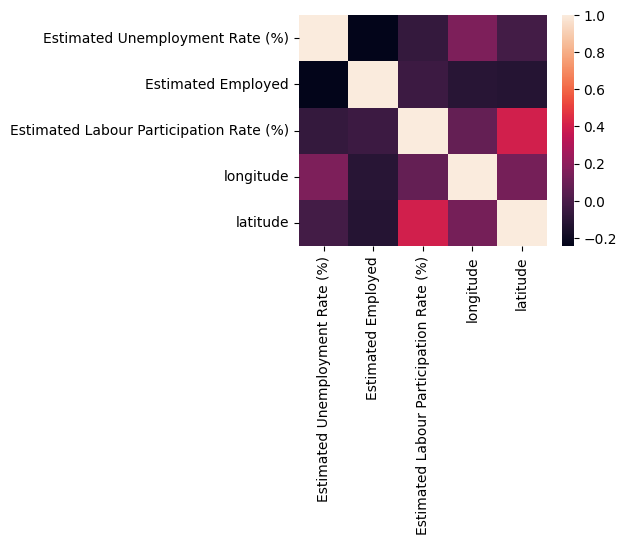

In [7]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr())
plt.show()

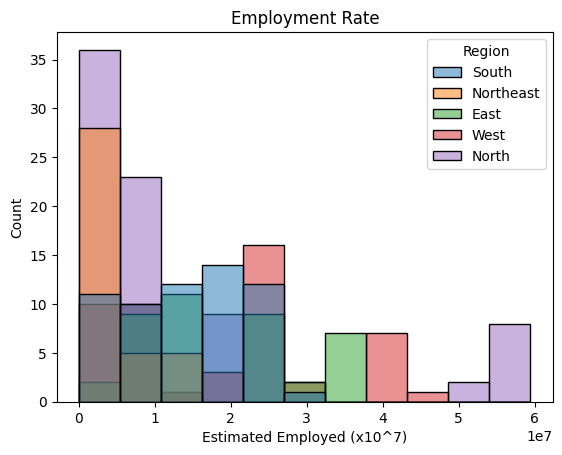

In [8]:
plt.title('Employment Rate')
sns.histplot(x='Estimated Employed', hue='Region', data=df)
plt.xlabel('Estimated Employed (x10^7)')
plt.ylabel('Count')
plt.show()

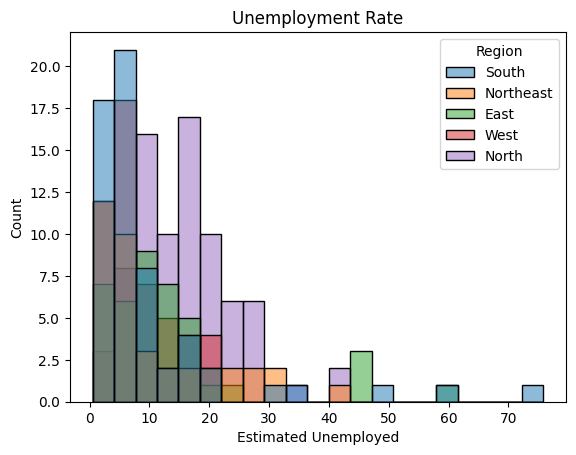

In [9]:
plt.title('Unemployment Rate')
sns.histplot(x='Estimated Unemployment Rate (%)', hue='Region', data=df)
plt.xlabel('Estimated Unemployed')
plt.ylabel('Count')
plt.show()

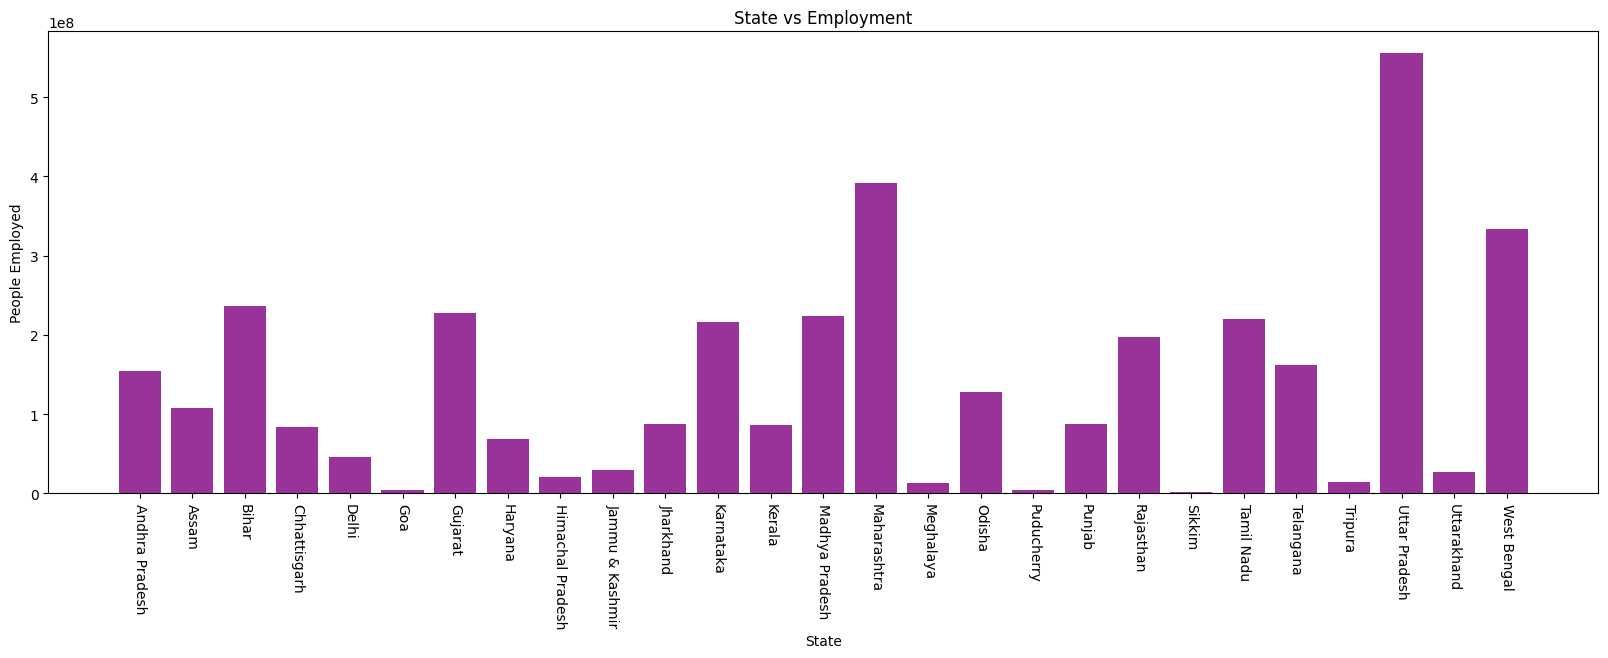

In [10]:
fig, ax = plt.subplots(figsize=(20,6))
grouped_data = df.groupby('State')['Estimated Employed'].sum().reset_index()

plt.bar(grouped_data['State'], grouped_data['Estimated Employed'], color='purple', alpha=0.8)

plt.xlabel('State')
plt.xticks(rotation=270)
plt.ylabel('People Employed')
plt.title('State vs Employment')

plt.show()

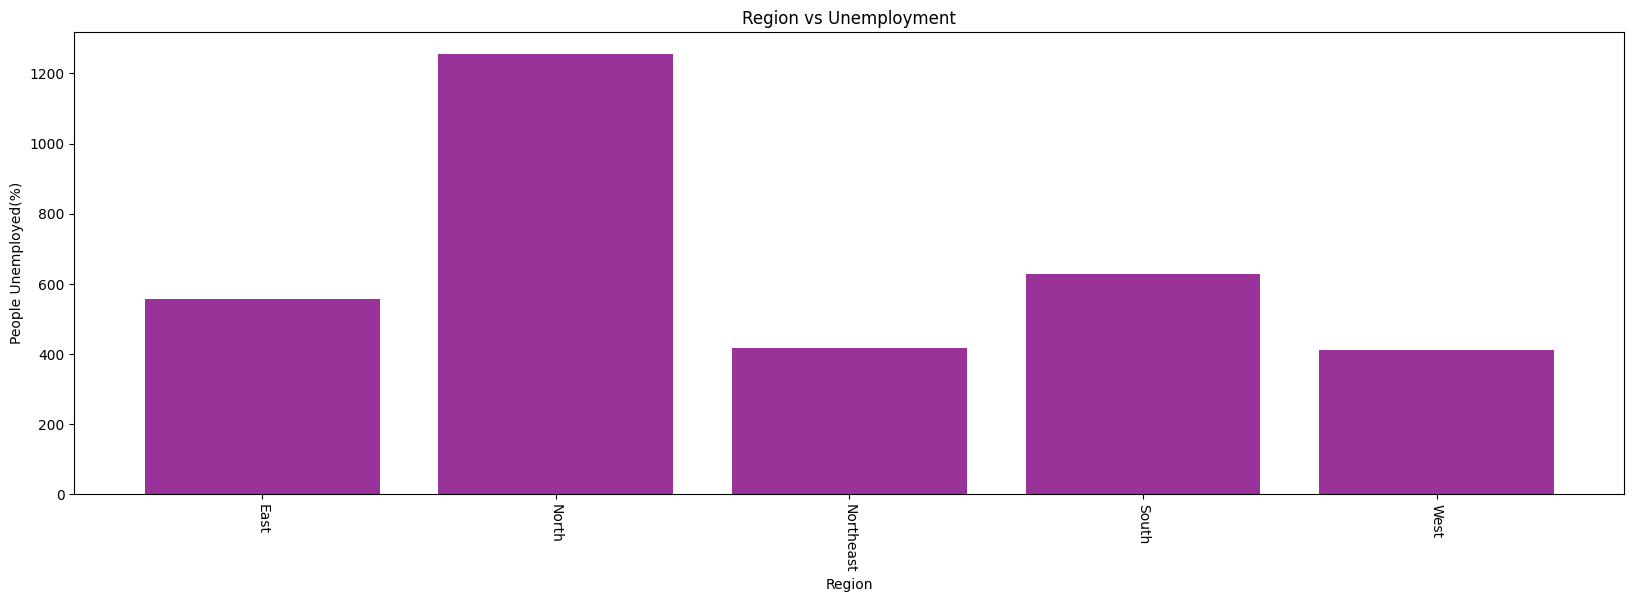

In [11]:
fig, ax = plt.subplots(figsize=(20,6))
grouped_data = df.groupby('Region')['Estimated Unemployment Rate (%)'].sum().reset_index()

plt.bar(grouped_data['Region'], grouped_data['Estimated Unemployment Rate (%)'], color='purple', alpha=0.8)

plt.xlabel('Region')
plt.xticks(rotation=270)
plt.ylabel('People Unemployed(%)')
plt.title('Region vs Unemployment')

plt.show()

In [12]:
# checking datatype of each column
df.dtypes

State                                       object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                           int64
Estimated Labour Participation Rate (%)    float64
Region                                      object
longitude                                  float64
latitude                                   float64
dtype: object

In [13]:
# converting Estimated Employed to percantage from int to a new column
df['Estimated Employed (%)'] = (df['Estimated Employed']/df['Estimated Employed'].sum())*10000
df.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude,Estimated Employed (%)
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74,44.624626
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74,44.383516
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74,42.601123
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74,30.411130
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74,34.842423


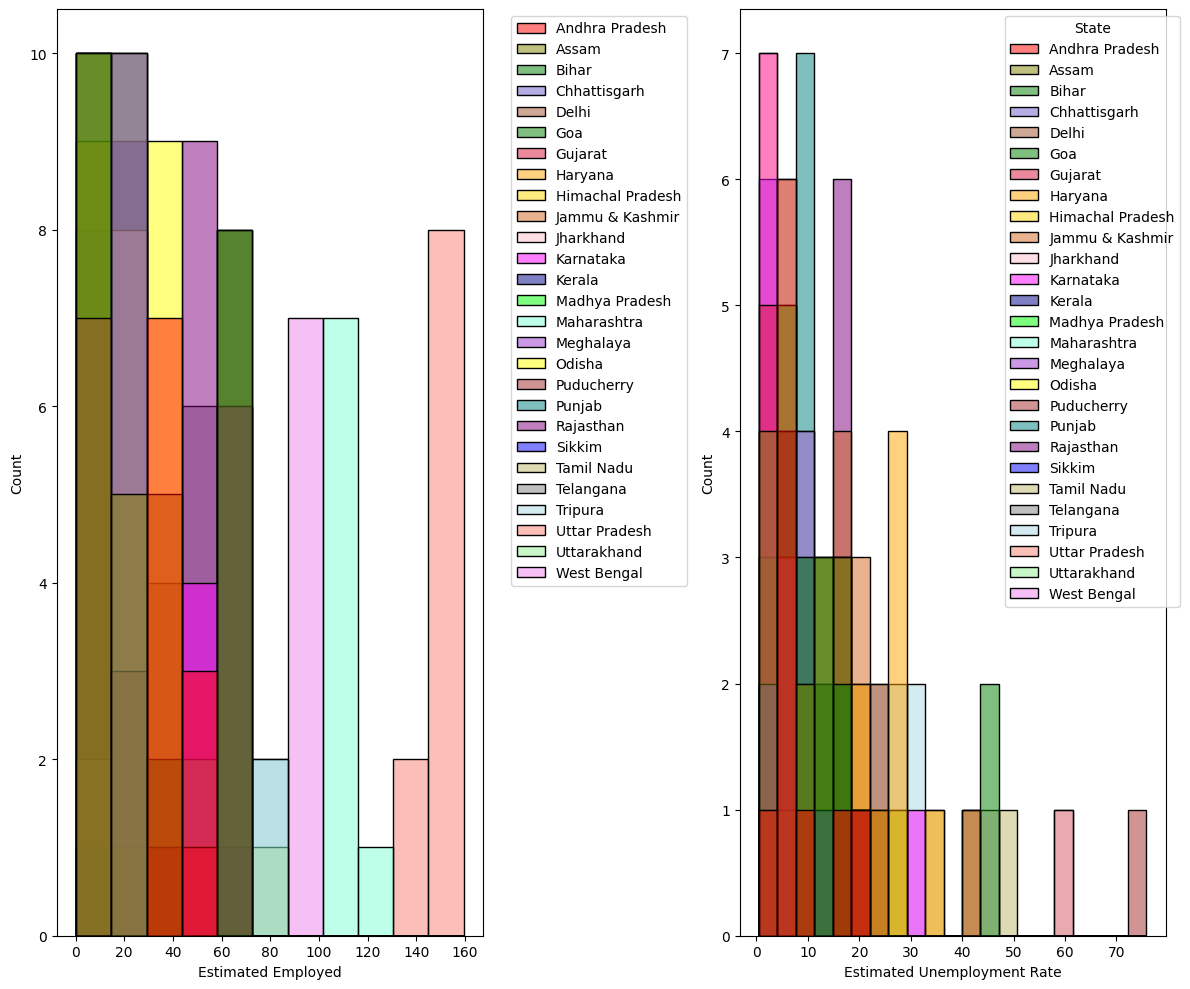

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
custompal = {'Andhra Pradesh':'red', 'Sikkim':'blue', 'Jharkhand':'pink', 'Odisha':'yellow', 'Bihar':'green', 'Goa':'green', 'Rajasthan':'purple', 'West Bengal':'violet', 'Telangana':'grey', 'Haryana':'orange', 'Madhya Pradesh':'lime', 'Kerala':'darkblue', 'Himachal Pradesh':'gold', 'Karnataka':'magenta', 'Jammu & Kashmir':'chocolate', 'Gujarat':'crimson', 'Chhattisgarh':'slateblue', 'Uttarakhand':'lightgreen', 'Assam':'olive', 'Delhi':'sienna', 'Puducherry':'brown', 'Uttar Pradesh':'salmon', 'Tripura':'lightblue', 'Maharashtra':'aquamarine', 'Punjab':'teal', 'Meghalaya':'darkorchid', 'Tamil Nadu':'darkkhaki'}

p1 = sns.histplot(x='Estimated Employed (%)', hue='State', data=df, ax=axes[0], palette=custompal)
axes[0].set_xlabel('Estimated Employed')
axes[0].set_ylabel('Count')

p2 = sns.histplot(x='Estimated Unemployment Rate (%)', hue='State', data=df, ax=axes[1], palette=custompal)
axes[1].set_xlabel('Estimated Unemployment Rate')
axes[1].set_ylabel('Count')

# Minimize the legend
legend = p1.get_legend()
legend.set_title('')
for text in legend.texts:
    text.set_fontsize(10)  # Adjust the font size as needed

# Position the legend outside the plot
p1.get_legend().set_bbox_to_anchor((1.05, 1))
p2.get_legend().set_bbox_to_anchor((1.05, 1))

plt.tight_layout()
plt.show()

In [15]:
# unemployment rate of each indian state by region
unemploment = df[["State", "Region", "Estimated Unemployment Rate (%)"]]
figure = px.sunburst(unemploment, path=["Region", "State"], 
                     values="Estimated Unemployment Rate (%)", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate State/Region")
figure.show()